In [1]:
using LinearAlgebra
using Plots

In [2]:
function Harr(n)    #Genera Matrices Ortogonales con ayuda de la mdeida de Harr U(n) con entradas imagniarias
    z = (randn(n,n) + im*randn(n,n))/sqrt(2.0)
    Q,R= qr(z)
    d=Diagonal(R)
    ph = d/abs.(d)
    RR=Q*ph*Q
    return RR
end

Harr (generic function with 1 method)

In [3]:
function HarR(n) #Genera Matrices Ortogonales con ayuda de la mdeida de Harr SO(n) Con entradas reales
    z = (randn(n,n))
    Q,R= qr(z)
    d=Diagonal(R)
    ph = d/abs.(d)
    RR=Q*ph*Q
    return RR
end

HarR (generic function with 1 method)

In [4]:
function lam_eigenvals_C(λ::Array{Complex{Float64},1})
    λr=Complex{Float64}[]
    for i=1:length(λ)
        if imag(λ[i]) != 0
            push!(λr,λ[i])
        end
    end
    return λr
end

lam_eigenvals_C (generic function with 1 method)

In [5]:
Pb1(s)=(π*s*0.5)*exp(-(π*s^2)/4)
Pb2(s)=(32/(π^2))*(s^2)*exp(-(4*s^2)/π)
Pb4(s)=(2^18/(3^6*π^3))*(s^4)*exp(-(64*s^2)/(9*π))

Pb4 (generic function with 1 method)

In [21]:
 @time begin
    tiradas=1000
    N=3
    λ=Complex{Float64}[] #Obteiene los eigenvalores de las matrices aleatorias O(3)
    for i=1:tiradas
        append!(λ,eigvals(HarR(N)))
    end
end

  0.074038 seconds (62.99 k allocations: 6.931 MiB)


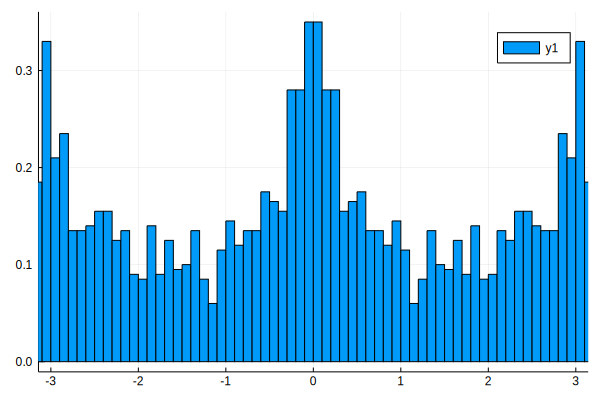

In [22]:
histogram(angle.(lam_eigenvals_C(λ)),normalized=true,bins=60, xlims=(-π,π))#, ylims=(0,1/(2*π))) #Histogrma del angulo de los eigenvalorees de las matrices aleaotrias O(3),dd

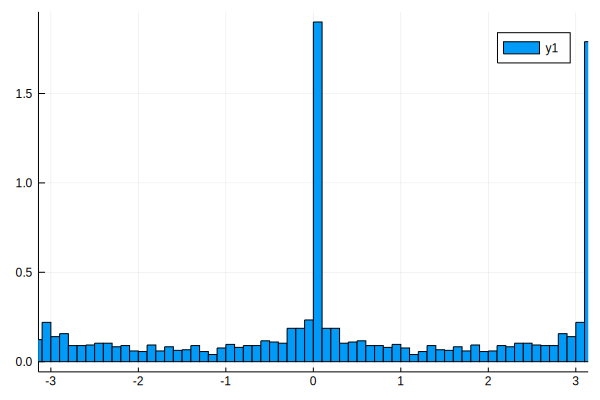

In [23]:
histogram(angle.(λ),normalized=true,bins=60,xlims=(-π,π))  #Histogrma del angulo de los eigenvalorees complejos y reales de las matrices aleaotrias O(3)

In [24]:
@time begin
    θ=Float64[] #Obteiene los eigenvalores de las matrices aleatorias O(3)
    for i=1:tiradas
        append!(θ,sort(angle.(eigvals(HarR(N)))))
    end
end

  0.073444 seconds (66.99 k allocations: 7.112 MiB)


In [25]:
Δθ=Float64[]
for i=1:tiradas
    for j=1:N-1
        s=(θ[((i-1)*N)+1:N*i][j+1]-θ[((i-1)*N)+1:N*i][j])*N/(2*π)
        append!(Δθ,s)
    end
end

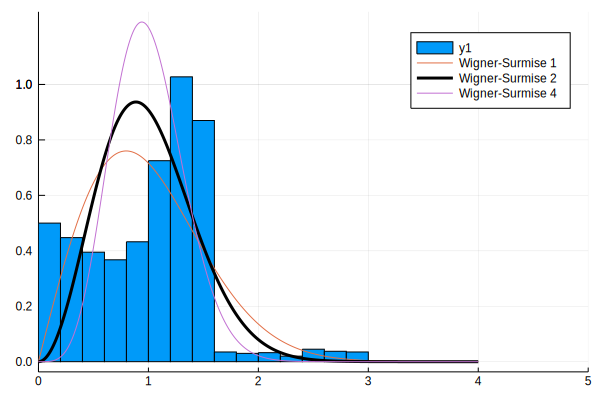

In [26]:
histogram(Δθ, normalize=true)
plot!(0:0.01:4, x->Pb1(x),label="Wigner-Surmise 1")
plot!(0:0.01:4, x->Pb2(x),label="Wigner-Surmise 2",lw = 3,color="black")
plot!(0:0.01:4, x->Pb4(x),label="Wigner-Surmise 4", xlims=(0,5))

In [50]:
det(HarR(3))

0.9999999999999994